# Lab 7 Hypothesis Testing

Welcome to Lab 7! In this lab, you can choose to work with your own dataset or use the dataset recommended. The goal for this lab is to carry out at least one Hypothesis test.

Let's start with importing all the Python modules. You may or may not need all of them, and feel free to add extra modules you want to use in the cell below.

Let's pick the significance level **alpha to be 5%**.

* What does this number mean? 
* Remember **5%** is not a magic number, you can pick 1% or 10% or 3.75%.
    * this should be more of a question for the domain expert
* However, you have to pick your alpha level before you carry out the hypothesis testing.  
    * changing your alpha after seeing a p-value is considered cheating!

In [1]:
import pandas as pd
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

import seaborn as sns

## Use your own data

Make sure your data file is saved in the same folder as this notebook, otherwise you will need to specify the file path to locate your data file. 

Only perform the steps you see necessary. Feel free to add or delete cells whenever you see fit.

Some numpy methods to generate a random sample from known distributions:
* [np.random.binomial(n, p, size)](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html)
* [np.random.normal(loc, scale, size)](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

To generate a random sample from your census:
* [df.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)

In [2]:
table = pd.read_csv("final.csv")
table

,county,state,fips,cases,deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,...,PERC_WHITE_FEMALE,PERC_BLACK_MALE,PERC_BLACK_FEMALE,PERC_ASIAN_MALE,PERC_ASIAN_FEMALE,PERC_HISPANIC_MALE,PERC_HISPANIC_FEMALE,PERC_OTHER_MALE,PERC_OTHER_FEMALE,Median AQI
0,Autauga,Alabama,1001.0,1015,21,0.053,0.074,0.134,0.295,0.444,...,0.388928,0.093737,0.107394,0.093737,0.107394,0.015823,0.014087,0.012368,0.012136,unknown
1,Baldwin,Alabama,1003.0,3101,22,0.083,0.059,0.098,0.323,0.436,...,0.449699,0.042494,0.045275,0.042494,0.045275,0.024839,0.022349,0.013524,0.013636,20.0
2,Barbour,Alabama,1005.0,598,5,0.067,0.121,0.120,0.201,0.491,...,0.232723,0.255651,0.226647,0.255651,0.226647,0.025480,0.019768,0.012517,0.008952,unknown
3,Bibb,Alabama,1007.0,363,2,0.020,0.034,0.096,0.278,0.572,...,0.376217,0.131330,0.081361,0.131330,0.081361,0.015317,0.012503,0.008886,0.008618,unknown
4,Blount,Alabama,1009.0,767,3,0.053,0.114,0.180,0.194,0.459,...,0.486874,0.008923,0.007989,0.008923,0.007989,0.051015,0.045516,0.010601,0.011033,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,Sweetwater,Wyoming,56037.0,240,2,0.061,0.295,0.230,0.146,0.268,...,0.454668,0.008195,0.005928,0.008195,0.005928,0.083863,0.076069,0.019177,0.018468,6.0
3074,Teton,Wyoming,56039.0,335,1,0.095,0.157,0.160,0.247,0.340,...,0.456785,0.004304,0.003026,0.004304,0.003026,0.080293,0.071173,0.014107,0.011976,41.0
3075,Uinta,Wyoming,56041.0,254,1,0.098,0.278,0.154,0.207,0.264,...,0.470879,0.003807,0.003708,0.003807,0.003708,0.045832,0.046673,0.017601,0.016859,5.0
3076,Washakie,Wyoming,56043.0,47,5,0.204,0.155,0.069,0.285,0.287,...,0.463549,0.003203,0.002434,0.003203,0.002434,0.072389,0.069571,0.019731,0.021268,unknown


In [4]:
table.columns

Index(['county', 'state', 'fips', 'cases', 'deaths', 'NEVER', 'RARELY',
       'SOMETIMES', 'FREQUENTLY', 'ALWAYS', 'percent_dem', 'dem or gop',
       'Unnamed: 0', 'TOT_POP', 'PERC_MALE', 'PERC_SENIOR_MALE',
       'PERC_SENIOR_FEMALE', 'PERC_WHITE_MALE', 'PERC_WHITE_FEMALE',
       'PERC_BLACK_MALE', 'PERC_BLACK_FEMALE', 'PERC_ASIAN_MALE',
       'PERC_ASIAN_FEMALE', 'PERC_HISPANIC_MALE', 'PERC_HISPANIC_FEMALE',
       'PERC_OTHER_MALE', 'PERC_OTHER_FEMALE', 'Median AQI'],
      dtype='object')

### Step 1: Form your hypothesis.

**Null Hypothesis**: ...

**Alternative Hypothesis**: ...

Questions to think about:
* What kind of hypothesis are you testing?
    * Is this assessing a known model (your null hypothesis model) or 
    * Is this comparing two samples?
    * Is your alternative hypothesis one-sided or two-sided?
* Do you know how to simulate data under the null hypothesis?
    * Can you generate another random sample from the population distribution under the null?

NOTES

Null Hypothesis: There is no statistically significant difference between average of (cases/tot_pop) across Texas counties when compared to all American counties (are Texas counties truly a random sample from all US counties?) 

Alternative Hypothesis: There is a statistically significant difference between average of (cases/tot_pop) across Texas counties when compared to all American counties (are Texas counties truly a random sample from all US counties?)

Alternative hypothesis is two-sided

Plan- 
take out relavant columns
create cases/tot_pop column
groupby state, then average

### Step 2: Pick a test statistic.

Questions to think about:
* Is your test statistic easy to calculate?
* How do you calculate this statistic for the observed data?
* How do you simulate a new test statistic under the null hypothesis?

In [5]:
relevant_table = table[["county", "state", "cases", "TOT_POP"]]
#county, state, cases, TOT_POP
relevant_table

,county,state,cases,TOT_POP
0,Autauga,Alabama,1015,55869
1,Baldwin,Alabama,3101,223234
2,Barbour,Alabama,598,24686
3,Bibb,Alabama,363,22394
4,Blount,Alabama,767,57826
...,...,...,...,...
3073,Sweetwater,Wyoming,240,42343
3074,Teton,Wyoming,335,23464
3075,Uinta,Wyoming,254,20226
3076,Washakie,Wyoming,47,7805


In [6]:
prop_cases = relevant_table["cases"]/relevant_table["TOT_POP"]
relevant_table["proportion"] = prop_cases

relevant_table

C:\Users\RU\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,county,state,cases,TOT_POP,proportion
0,Autauga,Alabama,1015,55869,0.018167
1,Baldwin,Alabama,3101,223234,0.013891
2,Barbour,Alabama,598,24686,0.024224
3,Bibb,Alabama,363,22394,0.016210
4,Blount,Alabama,767,57826,0.013264
...,...,...,...,...,...
3073,Sweetwater,Wyoming,240,42343,0.005668
3074,Teton,Wyoming,335,23464,0.014277
3075,Uinta,Wyoming,254,20226,0.012558
3076,Washakie,Wyoming,47,7805,0.006022


In [7]:
next_table = relevant_table.groupby(["state"])[["proportion"]].mean()
next_table

,proportion
state,
Alabama,0.020651
Arizona,0.024189
Arkansas,0.013942
California,0.009054
Colorado,0.006756
Connecticut,0.010452
Delaware,0.016030
District of Columbia,0.017182
Florida,0.019262


In [8]:
texas_counties = (table.loc[:,"state"] == "Texas").sum()
texas_mean = next_table.loc['Texas', 'proportion']

print("texas_counties: ", texas_counties)
print("texas_mean: ", texas_mean)

texas_counties:  250
texas_mean:  0.012299028986487905


In [9]:
prop_cases = relevant_table["cases"]/relevant_table["TOT_POP"]
relevant_table["proportion"] = prop_cases

random_sample = relevant_table.sample(texas_counties, replace=False)

random_sample

C:\Users\RU\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,county,state,cases,TOT_POP,proportion
2399,Grundy,Tennessee,97,13427,0.007224
2561,Hardeman,Texas,15,3933,0.003814
2445,Sequatchie,Tennessee,93,15026,0.006189
452,Marion,Georgia,136,8359,0.016270
626,Menard,Illinois,44,12196,0.003608
...,...,...,...,...,...
1355,Todd,Minnesota,413,24664,0.016745
2836,Middlesex,Virginia,26,10582,0.002457
1650,Hamilton,Nebraska,96,9324,0.010296
1326,Mille Lacs,Minnesota,54,26277,0.002055


In [10]:
np.average(random_sample['proportion'])

0.00978663566686766

### Step 3: Simulate the test statistic under the null.

In [16]:
averages = []
rep = 5000

prop_cases = relevant_table["cases"]/relevant_table["TOT_POP"]
relevant_table["proportion"] = prop_cases
    
for i in np.arange(rep):
    random_sample = relevant_table.sample(texas_counties, replace=False)
    new_average = np.average(random_sample['proportion'])
    averages = np.append(averages, new_average) 

C:\Users\RU\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Step 4: Compare and make a conclusion.

Questions to think about:

Is this a one-sided test or two-sided test?
If it is one-sided, which direction of your test statistic is favoring the alternative hypothesis?
Which tail(s) area should be your p-value?

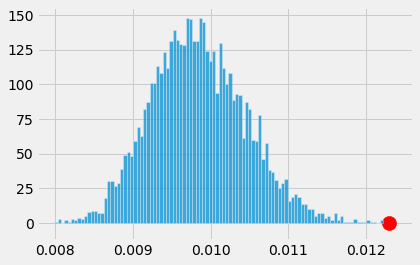

In [24]:
plots.hist(averages, bins=100, alpha=0.75)
#plots.plot([cut_off,cut_off],[0,400], color='yellow')
plots.scatter(texas_mean, 0, color='red', s=200);

In [27]:
np.average(averages >= texas_mean)

0.0

In [26]:
cut_off = np.percentile(averages, 5)
print('observed statistic: ', texas_mean)
print('5% of simulated statistic: ', cut_off)

observed statistic:  0.012299028986487905
5% of simulated statistic:  0.008886315662842523


CONCLUSION:

Because 5% of simulated statistic (0.008856530815288071) is less than the selected significance level (0.05), we reject the null hypothesis. There is a statistically significant difference between average of (cases/tot_pop) across Texas counties when compared to all American counties.

## Ues recommended data

**Please refer to the same sample code above if you are using this data.**

The [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) is an observational study of cardiovascular health. The initial study followed over 5,000 volunteers for several decades, and followup studies even looked at their descendants. In this section, we'll investigate some of its key findings about diet, cholesterol, and heart disease.

Run the cell below to examine data for almost 4,000 subjects from the first wave of the study, collected in 1956.

In [15]:
framingham = pd.read_csv('framingham.csv')
framingham

FileNotFoundError: [Errno 2] File framingham.csv does not exist: 'framingham.csv'

Each row contains data from one subject. The first seven columns describe the subject at the time of their initial medical exam at the start of the study. The last column, `ANYCHD`, tells us whether the subject developed some form of heart disease at any point after the start of the study.

You may have noticed that the table contains fewer rows than subjects in the original study: this is because we are excluding subjects who already had heart disease as well as subjects with missing data.

### Section 1: Diabetes and the population

Before we begin our investigation into cholesterol, we'll first look at some limitations of this dataset. In particular, we will investigate ways in which this is or isn't a representative sample of the population by examining the number of subjects with diabetes. The column `DIABETES` in the `framingham` table contains a 1 for subjects with diabetes and a `0` for those without.

[According to the CDC](https://www.cdc.gov/diabetes/statistics/slides/long_term_trends.pdf), the prevalence of diagnosed diabetes (i.e., the percentage of the population who have it) in the U.S. around this time was 0.93%. We are going to conduct a hypothesis test with the following null and alternative hypotheses:

### Step 1: Form your hypothesis.

**Null Hypothesis**: The probability that a participant within the Framingham Study has diabetes is equivalent to the prevalence of diagnosed diabetes within the population. (i.e., any difference is due to chance).

**Alternative Hypothesis**: The probability that a participant within the Framingham Study has diabetes is different than the prevalence of diagnosed diabetes within the population.

### Step 2: Pick a test statistic.

### Step 3: Simulate the test statistic under the null.

### Step 4: Compare and make a conclusion.

In [ ]:
# visualization

In [ ]:
# calculate p-value

**Your conclusion**: ...

In real-world studies, getting a truly representative random sample of the population is often incredibly difficult. Even just to accurately represent all Americans, a truly random sample would need to examine people across geographical, socioeconomic, community, and class lines (just to name a few). For a study like this, scientists would also need to make sure the medical exams were standardized and consistent across the different people being examined. In other words, there's a tradeoff between taking a more representative random sample and the cost of collecting all the data from the sample.

The Framingham study collected high-quality medical data from its subjects, even if the subjects may not be a perfect representation of the population of all Americans. This is a common issue that data scientists face: while the available data aren't perfect, they're the best we have. The Framingham study is generally considered the best in its class, so we'll continue working with it while keeping its limitations in mind.

(For more on representation in medical study samples, you can read these recent articles from [NPR](https://www.npr.org/sections/health-shots/2015/12/16/459666750/clinical-trials-still-dont-reflect-the-diversity-of-america) and [Scientific American](https://www.scientificamerican.com/article/clinical-trials-have-far-too-little-racial-and-ethnic-diversity/)).

### Section 2: Cholesterol and Heart Disease

Next, we are going to examine one of the main findings of the Framingham study: an association between serum cholesterol (i.e., how much cholesterol is in someone's blood) and whether or not that person develops heart disease.

We'll use the following null and alternative hypotheses:

### Step 1: Form your hypothesis.

**Null Hypothesis:** In the population, the average cholesterol levels among those who get heart disease is the same as the average cholesterol levels
among those who do not.

**Alternative Hypothesis:** The average cholesterol levels of people in the population who get
heart disease are higher than the average cholesterol level of people who do not.

### Step 2: Pick a test statistic.

### Step 3: Simulate the test statistic under the null.

### Step 4: Compare and make a conclusion.

In [ ]:
# visualization

In [ ]:
# calculate p-value

**Your conclusion**: ...

Despite the Framingham Heart Study's reputation as a well-conducted and rigorous study, it has some major limitations. Give one specific reason why it can't be used to say that high cholesterol **causes** heart disease.

**your anwser here**

Similar studies from the 1950s found positive associations between diets high in saturated fat, high cholesterol, and incidence of heart disease. In 1962, the U.S. Surgeon General said:

*"Although there is evidence that diet and dietary habits may be implicated in the development of coronary heart disease and may be significant in its prevention or control, at present our only research evidence is associative and not conclusive."*

## For more practice:
* Come up with other hypotheses to test with the Framingham data. 
* Come up with other hypotheses to test for some data questions you are interested in. 
    * what data is needed to test your hypotheis? 

You're finished with lab 7! Notice this is a group assignment so you only need to submit one copy for the entire team. Be sure to...

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file** to be lab07_Team_Name,
* **Upload** your notebook and any data file(s) to the course website.